### Steps in building your model
- Data processing
- Add input layer
- Random W and bias intialization
- Select Optimizer,Loss and Perfomance
- Compile the model
- Use model to fit and to train Data
- Evaluate model
- Readjust the model parameters if need be

In [57]:
import tensorflow as tf
from tensorflow import keras

In [5]:
print(tf.__version__)

2.1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [8]:
mnist = keras.datasets.fashion_mnist

In [10]:
type(mnist)

module

In [12]:
# Usually returns a tuple for training data and testing

(X_train,y_train),(X_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [15]:
# This images are have 10 categories labeled from 0-9
X_train.shape ,y_train.shape

((60000, 28, 28), (60000,))

In [18]:
np.max(X_train)

255

In [20]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

### Data exploration

In [22]:
# To see our split ratio
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

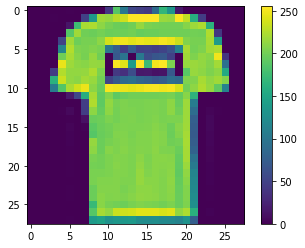

In [27]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [29]:
# Neural networks do not take values greater than 1 so we have to reduce 

X_train = X_train/255.0
X_test = X_test/255.0

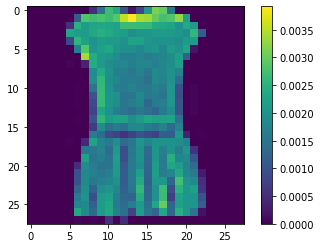

In [32]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()

### Building the model with TensorFlow and keras

In [34]:
from tensorflow.keras import Sequential
# flattens the array to one dimensional
from tensorflow.keras.layers import Flatten, Dense

In [58]:
# we specify an array because it takes in how many layers we want to add into the sequential network model
model = Sequential([
    
])
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu', ))
# Output layer
model.add(Dense(10, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model
- Loss function/Objective function
- Optimizer 
- metrics

In [61]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

### Training the model

In [62]:
# epochs = number of times a model is trained
history = model.fit(X_train,y_train, epochs = 10, batch_size = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 120s 3ms/sample - loss: 0.8901 - accuracy: 0.7045 - val_loss: 0.6166 - val_accuracy: 0.7714
Epoch 2/10
48000/48000 [==============================] - 29s 606us/sample - loss: 0.5706 - accuracy: 0.7934 - val_loss: 0.5376 - val_accuracy: 0.8036
Epoch 3/10
48000/48000 [==============================] - 27s 557us/sample - loss: 0.5084 - accuracy: 0.8193 - val_loss: 0.4920 - val_accuracy: 0.8233
Epoch 4/10
48000/48000 [==============================] - 27s 565us/sample - loss: 0.4743 - accuracy: 0.8320 - val_loss: 0.4697 - val_accuracy: 0.8322
Epoch 5/10
48000/48000 [==============================] - 21s 439us/sample - loss: 0.4517 - accuracy: 0.8409 - val_loss: 0.4523 - val_accuracy: 0.8402
Epoch 6/10
48000/48000 [==============================] - 21s 431us/sample - loss: 0.4349 - accuracy: 0.8466 - val_loss: 0.4369 - val_accuracy: 0.8449
Epoch 7/10
48000/48000 [=====================

In [43]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)

10000/10000 [==============================] - 2s 153us/sample - loss: 0.4632 - accuracy: 0.8331
0.8331


In [63]:
 # performing predictions using sklearn
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.8462

In [47]:
pred = model.predict(X_test)
pred

array([[7.7960232e-07, 1.9990294e-08, 6.5794061e-06, ..., 2.7549797e-01,
        4.5993710e-03, 5.3859812e-01],
       [2.6087867e-04, 3.8608277e-06, 9.1231948e-01, ..., 7.9527267e-16,
        6.5637229e-05, 4.3574232e-13],
       [3.2204203e-05, 9.9977523e-01, 6.3208304e-06, ..., 5.8121783e-09,
        5.9927658e-09, 2.7239338e-11],
       ...,
       [2.2731835e-02, 1.7984689e-06, 6.7301845e-04, ..., 3.8577655e-05,
        8.5123789e-01, 4.2026527e-06],
       [5.2490537e-05, 9.9562460e-01, 3.2090120e-05, ..., 2.8461357e-06,
        8.6180222e-08, 1.3559938e-07],
       [7.7456942e-05, 1.6697948e-05, 5.3781766e-04, ..., 6.0309310e-02,
        1.0252901e-02, 3.3717279e-03]], dtype=float32)

In [49]:
pred[0]


array([7.7960232e-07, 1.9990294e-08, 6.5794061e-06, 6.6819457e-06,
       8.0479995e-06, 1.8125917e-01, 2.3213675e-05, 2.7549797e-01,
       4.5993710e-03, 5.3859812e-01], dtype=float32)

In [56]:
np.argmax(pred[11])

5

## Plotting learning curves

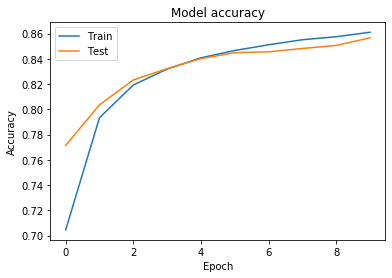

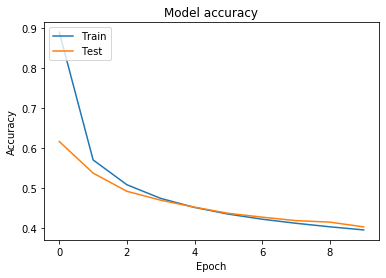

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# plotting training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')

plt.show()

### Plotting confusion matrix

In [68]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26f9f8241c8>)

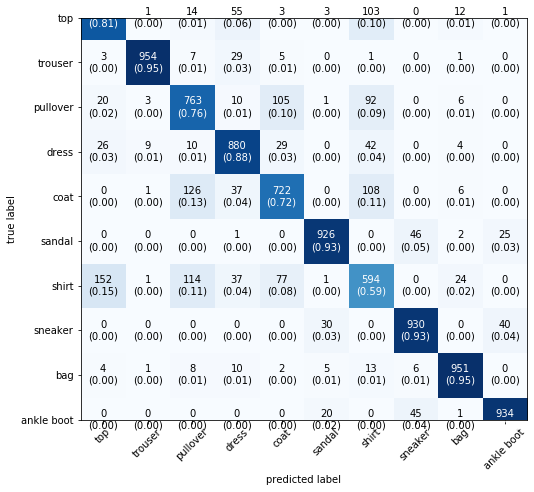

In [69]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = mat, figsize= (8,8),class_names=class_names,show_normed = True)